In [1]:
import pandas as pd
import torch_geometric as pyg

ModuleNotFoundError: No module named 'torch_geometric'

In [2]:
pip list

Package                  Version
------------------------ --------
aiofiles                 22.1.0
aiosqlite                0.19.0
anyio                    3.6.2
argon2-cffi              21.3.0
argon2-cffi-bindings     21.2.0
arrow                    1.2.3
asttokens                2.2.1
attrs                    23.1.0
Babel                    2.12.1
backcall                 0.2.0
beautifulsoup4           4.12.2
bleach                   6.0.0
catboost                 1.2.5
certifi                  2023.5.7
cffi                     1.15.1
charset-normalizer       3.1.0
colorama                 0.4.6
comm                     0.1.3
contourpy                1.0.7
coverage                 5.5
cycler                   0.11.0
debugpy                  1.6.7
decorator                5.1.1
defusedxml               0.7.1
deprecation              2.1.0
dill                     0.3.8
et-xmlfile               1.1.0
executing                1.2.0
eyed3                    0.9.7
fastjsonschema          


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\fedor\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [2]:
df = pd.read_excel("data/19_35000.xlsx", index_col=0).reset_index(drop=True)
df

,Title,IC50,SMILES
0,CHEMBL2206459,0.000015,[H]\N=C(N)\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=...
1,CHEMBL3818159,0.000016,O=C(O)C1=C[C@H](N)[C@@H](NC(=O)C)[C@@H](C1)COC...
2,CHEMBL1956716,0.000033,C=CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O...
3,CHEMBL1956715,0.000032,CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O)O...
4,CHEMBL4444029,0.000041,O=C(O)c1c(O)c(=O)cc([nH]1)-c(c2C)ccc(c2)-c3noc...
...,...,...,...
36372,CHEMBL3699085,2366.790000,CC(=O)N[C@H]1CC[C@@H]([C@@H]12)[C@@H](O[Si](C)...
36373,CHEMBL109004,2372.100000,CC(=O)Nc(cc1)c(OC(=O)C)cc1C(=O)O
36374,CHEMBL2259758,2600.970000,c1cccc(c12)cccc2CNC(=O)CCCCCCO[C@]3(C(=O)O)C[C...
36375,CHEMBL109781,2793.000000,NCCCC(=O)Nc(c(cc1)NC(=O)C)cc1C(=O)O


In [9]:
from rdkit import Chem
from rdkit.Chem import Draw

m = Chem.MolFromSmiles(df["SMILES"].tolist()[1])
img = Draw.MolToImage(m)

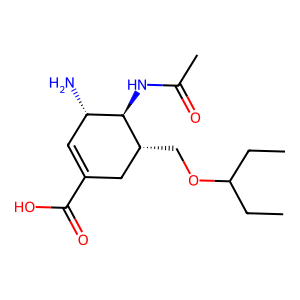

In [10]:
img

In [11]:
x = pyg.utils.smiles.from_smiles(df["SMILES"].tolist()[1])

In [12]:
x

Data(x=[21, 9], edge_index=[2, 42], edge_attr=[42, 3], smiles='O=C(O)C1=C[C@H](N)[C@@H](NC(=O)C)[C@@H](C1)COC(CC)CC')